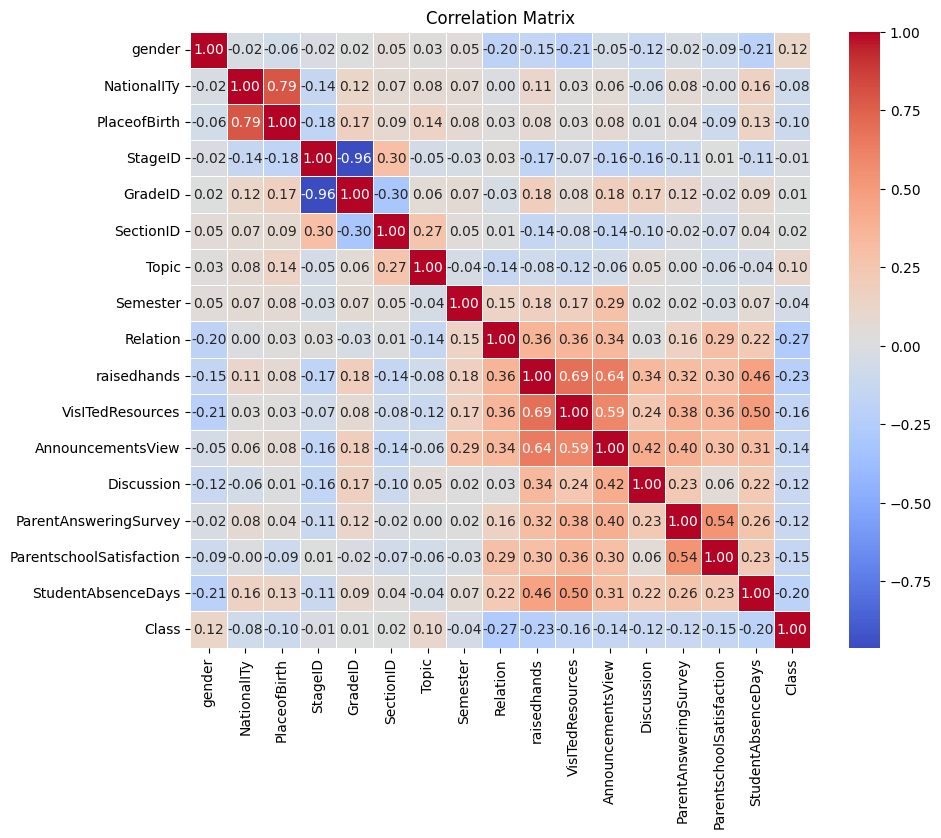

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('xAPI-Edu-Data.csv')

label_encoder = LabelEncoder()

# Chuyển các cột phân loại thành số
df['gender'] = label_encoder.fit_transform(df['gender'])
df['NationalITy'] = label_encoder.fit_transform(df['NationalITy'])
df['PlaceofBirth'] = label_encoder.fit_transform(df['PlaceofBirth'])
df['StageID'] = label_encoder.fit_transform(df['StageID'])
df['GradeID'] = label_encoder.fit_transform(df['GradeID'])
df['SectionID'] = label_encoder.fit_transform(df['SectionID'])
df['Topic'] = label_encoder.fit_transform(df['Topic'])
df['Semester'] = label_encoder.fit_transform(df['Semester'])
df['Relation'] = label_encoder.fit_transform(df['Relation'])
df['ParentAnsweringSurvey'] = label_encoder.fit_transform(df['ParentAnsweringSurvey'])
df['ParentschoolSatisfaction'] = label_encoder.fit_transform(df['ParentschoolSatisfaction'])
df['StudentAbsenceDays'] = label_encoder.fit_transform(df['StudentAbsenceDays'])
df['Class'] = label_encoder.fit_transform(df['Class'])

# Chuẩn hóa các cột số
scaler = StandardScaler()
numeric_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
corr_matrix = df.corr()

# In ra ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import numpy as np

# Tạo dữ liệu
data = pd.read_csv('xAPI-Edu-Data.csv')

label_cols = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

label_encoder = LabelEncoder()

for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Chuẩn hóa các dữ liệu số
scaler = StandardScaler()
numeric_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Phân chia dữ liệu thành X (đặc trưng) và y (nhãn)
X = data.drop('Class', axis=1)
X = scaler.fit_transform(X)
y = data['Class']

[[ 0.7574764  -0.1402013  -0.15155299 ...  0.8819171   0.80239368
   0.81295735]
 [ 0.7574764  -0.1402013  -0.15155299 ...  0.8819171   0.80239368
   0.81295735]
 [ 0.7574764  -0.1402013  -0.15155299 ... -1.13389342 -1.24627103
  -1.23007683]
 ...
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
   0.81295735]
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
  -1.23007683]
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
  -1.23007683]]
SVM Mean Accuracy (CV=5): 0.68 ± 0.06
KNN Mean Accuracy (CV=5): 0.60 ± 0.04
Decision Tree Mean Accuracy (CV=5): 0.58 ± 0.03
Naive Bayes Mean Accuracy (CV=5): 0.68 ± 0.04


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.wa

ANN Mean Accuracy (CV=5): 0.60 ± 0.10


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
models = {
    "Naive Bayes": GaussianNB(),
    "ANN": MLPClassifier(max_iter=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel="linear", random_state=42)
}

# Cross-validation (5-fold)
cv = 5  # 5-fold cross-validation
results = {}

# Đánh giá các mô hình
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    results[model_name] = scores
    print(f"🔹 {model_name}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

# In kết quả tổng hợp
print("\nKết quả tổng hợp cho các mô hình:")
for model_name, scores in results.items():
    print(f"{model_name}:")
    print(f"  Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")
    print("-" * 50)

🔹 Naive Bayes: Accuracy = 0.6771 ± 0.0406


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

🔹 ANN: Accuracy = 0.6438 ± 0.0803
🔹 KNN: Accuracy = 0.5938 ± 0.0688
🔹 Decision Tree: Accuracy = 0.5687 ± 0.0420
🔹 SVM: Accuracy = 0.6813 ± 0.0561

Kết quả tổng hợp cho các mô hình:
Naive Bayes:
  Mean Accuracy = 0.6771, Std = 0.0406
--------------------------------------------------
ANN:
  Mean Accuracy = 0.6438, Std = 0.0803
--------------------------------------------------
KNN:
  Mean Accuracy = 0.5938, Std = 0.0688
--------------------------------------------------
Decision Tree:
  Mean Accuracy = 0.5687, Std = 0.0420
--------------------------------------------------
SVM:
  Mean Accuracy = 0.6813, Std = 0.0561
--------------------------------------------------


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Giả sử bạn đã có X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Các mô hình cần tối ưu hóa
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "ANN": MLPClassifier(max_iter=1000)
}

# Các tham số để tìm kiếm trong GridSearchCV
param_grids = {
    "KNN": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    "Naive Bayes": {'var_smoothing': [1e-9, 1e-8, 1e-7]},
    "Decision Tree": {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]},
    "SVM": {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100], 'gamma': ['scale', 'auto']},
    "ANN": {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['tanh', 'relu'], 'solver': ['adam']}
}

# GridSearchCV với các mô hình và tham số tìm kiếm
for model_name in models:
    print(f"Optimizing {model_name}...")
    
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # In kết quả của GridSearchCV
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # Dự đoán và đánh giá mô hình
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name} with best parameters: {accuracy:.4f}\n")


Optimizing KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy of KNN with best parameters: 0.6528

Optimizing Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Accuracy of Naive Bayes with best parameters: 0.7431

Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}
Accuracy of Decision Tree with best parameters: 0.6319

Optimizing SVM...
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of SVM with best parameters: 0.7292

Optimizing ANN...
Best parameters for ANN: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Accuracy of ANN with best parameters: 0.6806



C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Định nghĩa các mô hình
models = {
    "SVM": SVC(kernel="linear"),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "ANN": MLPClassifier(max_iter=100, random_state=,solver='adam'),
    "Decision Tree": DecisionTreeClassifier(random_state=25)
}

# 1. Chọn đặc trưng sử dụng RFE (Recursive Feature Elimination) và Lasso
selector_rfe = RFE(estimator=SVC(kernel="linear"), n_features_to_select=6)
selector_lasso = Lasso(alpha=0.01)

# Áp dụng RFE và Lasso vào dữ liệu
X_rfe = selector_rfe.fit_transform(X, y)
X_lasso = X[:, selector_lasso.fit(X, y).coef_ != 0]

# Định nghĩa các tham số để Grid Search
param_grids = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, 10, None],
            "criterion": ["gini", "entropy"]
        }},
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "gamma": ['scale', 'auto']
        }},
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance']
        }},
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}  # Naive Bayes không có nhiều tham số để tối ưu hóa
    },
    "ANN": {
        "model": MLPClassifier(max_iter=100, random_state=42),
        "params": {
            "hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "activation": ["tanh", "relu"],
            "alpha": [0.0001, 0.001, 0.01]
        }}
}

# 2. Áp dụng Grid Search cho tất cả các mô hình với dữ liệu đã chọn đặc trưng
cv = 5  # 5-fold cross-validation
results = {}

# Dùng dữ liệu đã chọn đặc trưng
for model_name, model in models.items():
    print(f"Đang thực hiện Grid Search cho mô hình {model_name}...")

    # Lấy tham số tìm kiếm cho Grid Search
    param_grid = param_grids.get(model_name, {}).get("params", {})
    
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
        
        # Đánh giá mô hình với dữ liệu chọn đặc trưng qua cross-validation
        if model_name in ["ANN", "SVM", "KNN", "Naive Bayes"]:
            grid_search.fit(X_rfe, y)
            best_params_rfe = grid_search.best_params_
            best_score_rfe = grid_search.best_score_
            
            grid_search.fit(X_lasso, y)
            best_params_lasso = grid_search.best_params_
            best_score_lasso = grid_search.best_score_
            
            results[model_name] = {
                "RFE Best Params": best_params_rfe,
                "RFE Best Score": best_score_rfe,
                "Lasso Best Params": best_params_lasso,
                "Lasso Best Score": best_score_lasso
            }
        else:
            grid_search.fit(X_rfe, y)
            best_params_rfe = grid_search.best_params_
            best_score_rfe = grid_search.best_score_
            
            grid_search.fit(X_lasso, y)
            best_params_lasso = grid_search.best_params_
            best_score_lasso = grid_search.best_score_
            
            results[model_name] = {
                "RFE Best Params": best_params_rfe,
                "RFE Best Score": best_score_rfe,
                "Lasso Best Params": best_params_lasso,
                "Lasso Best Score": best_score_lasso
            }

# 3. In kết quả tối ưu từ Grid Search
print("\nKết quả tối ưu từ Grid Search cho tất cả các mô hình:")
for model_name, res in results.items():
    print(f"\n{model_name}:")
    print(f"  RFE Best Params: {res['RFE Best Params']}")
    print(f"  RFE Best Score: {res['RFE Best Score']:.4f}")
    print(f"  Lasso Best Params: {res['Lasso Best Params']}")
    print(f"  Lasso Best Score: {res['Lasso Best Score']:.4f}")
    print("-" * 50)




Đang thực hiện Grid Search cho mô hình SVM...
Đang thực hiện Grid Search cho mô hình KNN...
Đang thực hiện Grid Search cho mô hình Naive Bayes...
Đang thực hiện Grid Search cho mô hình ANN...


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Đang thực hiện Grid Search cho mô hình Decision Tree...

Kết quả tối ưu từ Grid Search cho tất cả các mô hình:

SVM:
  RFE Best Params: {'C': 0.1, 'gamma': 'scale'}
  RFE Best Score: 0.7208
  Lasso Best Params: {'C': 0.1, 'gamma': 'scale'}
  Lasso Best Score: 0.7125
--------------------------------------------------

KNN:
  RFE Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
  RFE Best Score: 0.7021
  Lasso Best Params: {'n_neighbors': 7, 'weights': 'distance'}
  Lasso Best Score: 0.6687
--------------------------------------------------

ANN:
  RFE Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
  RFE Best Score: 0.7458
  Lasso Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
  Lasso Best Score: 0.7229
--------------------------------------------------

Decision Tree:
  RFE Best Params: {'criterion': 'gini', 'max_depth': 5}
  RFE Best Score: 0.7104
  Lasso Best Params: {'criterion': 'entropy', 'max_depth': 5}
  

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Định nghĩa các mô hình base
base_learners = [
    ("SVM", SVC(C=0.1, kernel="linear", gamma='scale', random_state=25)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5, criterion="gini", random_state=25))
]

# Định nghĩa meta-model
meta_model = LogisticRegression(C=1, solver='liblinear', random_state=25)

# Tạo Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Định nghĩa cross-validation và số lần lặp lại
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=25)

# Tham số GridSearch cho SVM và Decision Tree (có thể bạn đã biết tham số này)
param_grid = {
    'SVM__C': [1, 10],
    'SVM__gamma': ['scale', 'auto'],
    'Decision Tree__max_depth': [3, 5, 10],
}

# Thực hiện Grid Search với cross-validation và repeated cross-validation
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình với GridSearch và Cross-Validation
grid_search.fit(X_train, y_train)

# Lấy kết quả tốt nhất từ GridSearch
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Dự đoán và đánh giá
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# In kết quả
print(f"Best Parameters from GridSearch: {best_params}")
print(f"Best CV Score from GridSearch: {best_score:.4f}")
print(f"Accuracy of the model on Test Set: {accuracy:.4f}")


Best Parameters from GridSearch: {'Decision Tree__max_depth': 3, 'SVM__C': 10, 'SVM__gamma': 'scale'}
Best CV Score from GridSearch: 0.7318
Accuracy of the model on Test Set: 0.8438
